<span style="color:#8DB6CD; font-size:30px">**Datos estructurales**</span>
***




<span style="color:#FFB3A7; font-size:20px">**Índice**</span>
 
- [Cargando la información del sondeo](#cargando-informacion-sondeo)
- [Procesar datos (validación)](#procesar-datos-validacion)
- [Generar gráfico](#generar-grafico)
- [Figuras estereográficas](#figuras_estereograficas)


### <a id="cargando-informacion-sondeo"></a> <span style="color:#FFB3A7; font-size:20px"> **Cargando la información del sondeo** </span>
***

En este notebook, usaremos el archivo `M_R38_Fracturas.txt` que cuenta con datos de profundidad, Dip y Azimuth.

Primero, importaremos las librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplstereonet
import seaborn as sns

Cargamos el archivo y creamos un DataFrame:

In [2]:
# Cargamos  datos desde el archivo TXT
data = pd.read_csv("datos_txt/M_R38_Fracturas.txt", delim_whitespace=True, encoding="utf-8")

# Ahora puedes trabajar con el DataFrame 'data'
# Ver las primeras filas para asegurarnos de que se cargó correctamente
print(data.head())

   Depth Azimuth    Dip
0      m     deg    deg
1  24.32   21.32  63.24
2  24.42   25.51  65.19
3  25.18   24.86  57.89
4   25.3   23.96  58.38


Mostramos la información:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Depth    58 non-null     object
 1   Azimuth  58 non-null     object
 2   Dip      58 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


### <a id="procesar-datos-validacion"></a> <span style="color:#FFB3A7; font-size:20px"> **Procesar datos (validación)** </span>
***

Ahora procesamos los datos eliminando las unidades de cada columna y convirtiéndolos a formato numérico para que sean más fáciles de manejar.

In [4]:
data = data.iloc[1:].copy()  # Eliminar la fila de unidades en los datos de temperatura
data = data.apply(pd.to_numeric, errors='ignore')  # Convertir datos a numéricos
data.head() # Muestra las primeras filas para verificar

,Depth,Azimuth,Dip
1,24.32,21.32,63.24
2,24.42,25.51,65.19
3,25.18,24.86,57.89
4,25.30,23.96,58.38
5,25.41,31.53,58.38


In [5]:
data.info() #verificamos que el tipo de dato sea numéricos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 1 to 57
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth    57 non-null     float64
 1   Azimuth  57 non-null     float64
 2   Dip      57 non-null     float64
dtypes: float64(3)
memory usage: 1.5 KB


**Cálculo de Strike a partir del Azimuth**

Se suma 90° al Azimuth para convertirlo a Strike.
Se usa % 360 para asegurarse de que el resultado esté en el rango 0°-360°.

In [6]:
# Aplicar corrección al Azimuth (Polar Projection - Dip)
data["Strike"] = (data["Azimuth"] - 90) % 360


### <a id="generar-grafico"></a> <span style="color:#FFB3A7; font-size:20px"> **Generar Gráfico** </span>
***

**Histogramas de Azimut y Buzamiento**

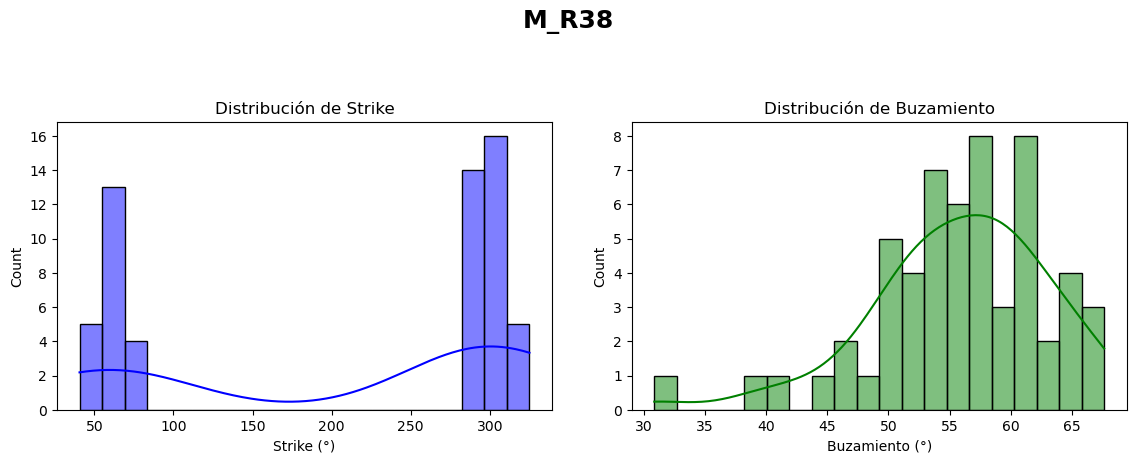

In [18]:
# Histogramas de Azimut y Buzamiento
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data["Strike"], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribución de Strike")
axes[0].set_xlabel("Strike (°)")

sns.histplot(data["Dip"], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribución de Buzamiento")
axes[1].set_xlabel("Buzamiento (°)")

# Agregar título centrado para toda la figura
fig.suptitle('M_R38', fontsize=18, fontweight='bold', y=0.97)  # Ajusta 'y' para moverlo más arriba si es necesario

# Ajustar diseño y guardar la figura
plt.tight_layout(pad=3.0)
plt.savefig("datos_png_pdf/M_R38_Distribución_Strikeybuzamiento.png", dpi=300)
plt.savefig("datos_png_pdf/M_R38_Distribución_Strikeybuzamiento.pdf", format='pdf')

plt.show()

**Densidad de fracturas en función de la profundidad**

In [8]:
# Redondear profundidad al metro más cercano
data["Depth_rounded"] = data["Depth"].astype(int)
data.head() # Muestra las primeras filas para verificar

,Depth,Azimuth,Dip,Strike,Depth_rounded
1,24.32,21.32,63.24,291.32,24
2,24.42,25.51,65.19,295.51,24
3,25.18,24.86,57.89,294.86,25
4,25.30,23.96,58.38,293.96,25
5,25.41,31.53,58.38,301.53,25


In [9]:
# Contar cuántas fracturas hay en cada metro de profundidad
fracture_counts = data["Depth_rounded"].value_counts().sort_index()
fracture_counts.head() # Muestra las primeras filas para verificar

Depth_rounded
24    2
25    3
27    2
30    3
31    1
Name: count, dtype: int64

In [10]:
# Crear DataFrame con la densidad de fracturas por metro
df_fracture_intensity = pd.DataFrame({
    "Depth": fracture_counts.index,
    "Fracture_Intensity": fracture_counts.values
})

# Ordenar por profundidad (importante para graficar correctamente)
df_fracture_intensity.sort_values("Depth", ascending=True, inplace=True)

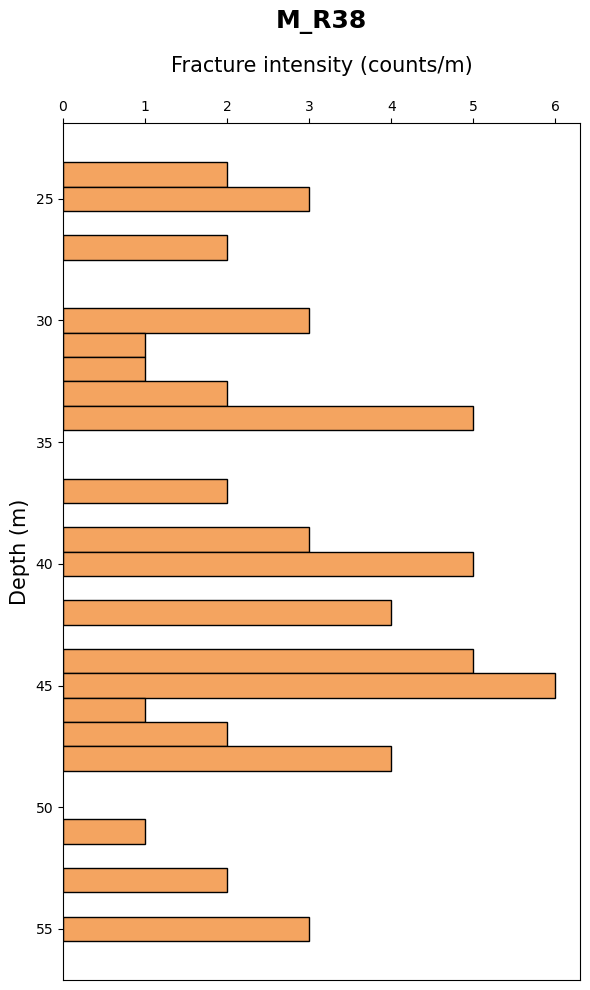

In [11]:
# Crear la figura
fig, ax = plt.subplots(figsize=(6, 10))

# Graficar la intensidad de fracturas con rectángulos
ax.barh(
    df_fracture_intensity["Depth"],               # Eje Y (Profundidad)
    df_fracture_intensity["Fracture_Intensity"],  # Eje X (Cantidad de fracturas por metro)
    height=1,                                     # Altura de cada rectángulo (1 metro)
    color="sandybrown",                                 # Color de las barras
    edgecolor="black"                             # Borde negro para mejor visibilidad
)

# Configuración de los ejes
ax.set_xlabel('Fracture intensity (counts/m)', fontsize=15, labelpad=20)
ax.set_ylabel('Depth (m)', fontsize=15)
ax.invert_yaxis()  # Invertir eje Y para que la profundidad vaya hacia abajo
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

# Agregar título
ax.set_title('M_R38', fontsize=18, fontweight='bold', pad=20)

# Ajustar diseño y guardar la figura
plt.tight_layout()
plt.savefig("datos_png_pdf/M_R38_Fracturas_intensity.png", dpi=300)
plt.savefig("datos_png_pdf/M_R38_Fracturas_intensity.pdf", format='pdf')

# Mostrar la figura
plt.show()



### <a id="figuras_estereograficas"></a> <span style="color:#FFB3A7; font-size:20px"> **Figuras estereográficas** </span>
***

visualizaremos información de geología estructural a través de figuras estereográficas de tipo equiareal (red de Schmidtt).


**Diagrama de Polos**

In [12]:
strike = data["Strike"]
dip = data["Dip"]

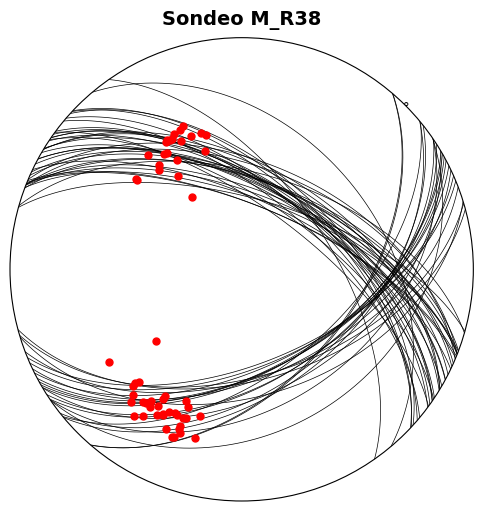

In [20]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)

# Agregar título con el nombre del sondeo
fig.suptitle("Sondeo M_R38", fontsize=14, fontweight="bold")
ax = fig.add_subplot(111, projection="equal_area_stereonet")

ax.plane(strike, dip, c="black", linewidth=0.5)
ax.pole(strike, dip, c="red", markersize=5)

plt.show()

**Diagrama de densidad de polos**

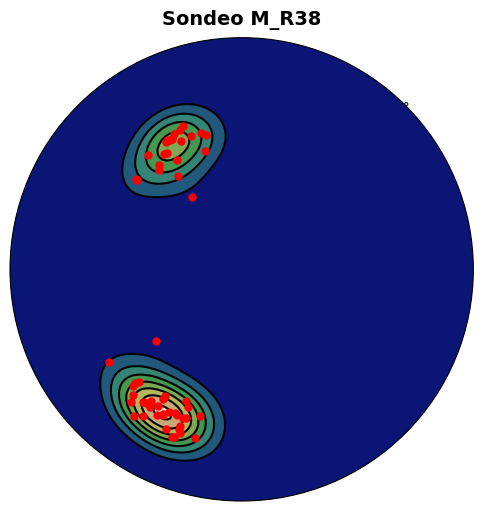

In [21]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)
ax = fig.add_subplot(111, projection="equal_area_stereonet")


fig.suptitle("Sondeo M_R38", fontsize=14, fontweight="bold") # Agregar título con el nombre del sondeo

ax.density_contour(strike, dip, measurement="poles", colors="black", sigma=1.5) #lineas de contorno
cax = ax.density_contourf(strike, dip, measurement="poles", cmap="gist_earth", sigma=1.5) #colorea las lineas de contorno
   
ax.pole(strike, dip, c="red", ms=5)

plt.show()